In [ ]:
!pip install pandas catboost

In [ ]:
from catboost  import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc,make_scorer, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
#from google.colab import drive
#drive.mount('/train.csvvv')

# Data preprocessing

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
#set id as index
data.set_index('id', inplace=True)

In [ ]:
data.pop("Unnamed: 0")

,Unnamed: 0
id,
70172,0
5047,1
110028,2
24026,3
119299,4
...,...
94171,103899
73097,103900
68825,103901


In [ ]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 70172 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    103904

In [ ]:
data.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


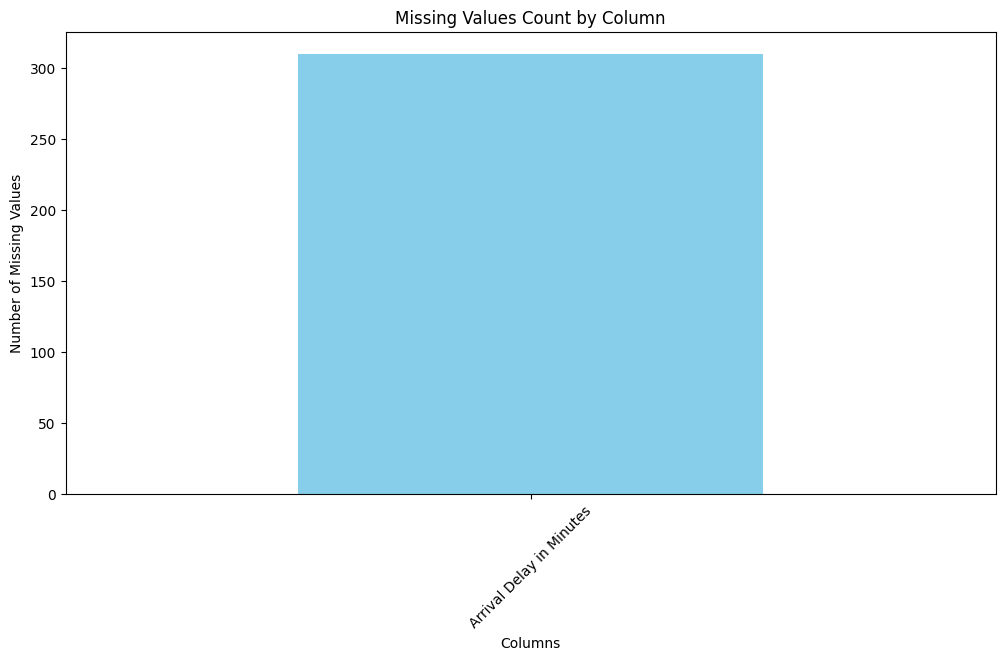

In [ ]:
# Count missing values
missing_counts = data.isnull().sum()

# Filter out columns with no missing values
missing_counts = missing_counts[missing_counts > 0]

# Create a bar plot
plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

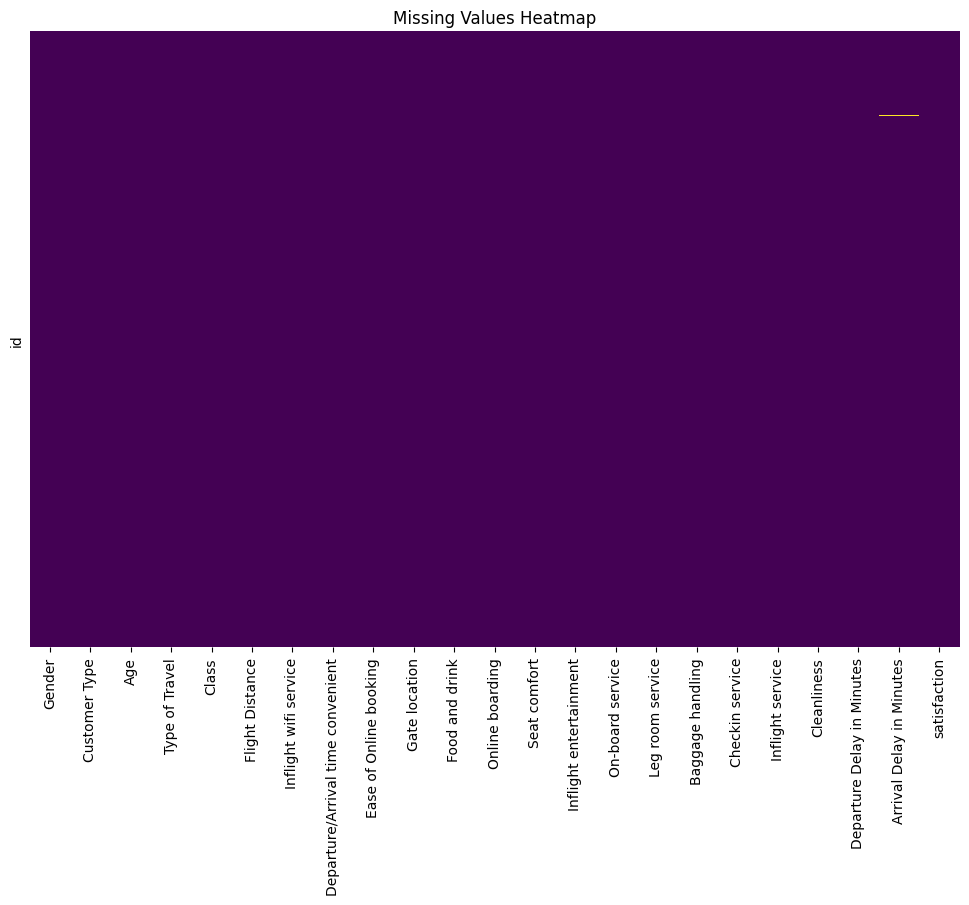

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Title and display the heatmap
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Check for duplicate rows
duplicates = data.duplicated()

# Count the total number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
#Filling missing values by mean
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

<Figure size 1600x1200 with 0 Axes>

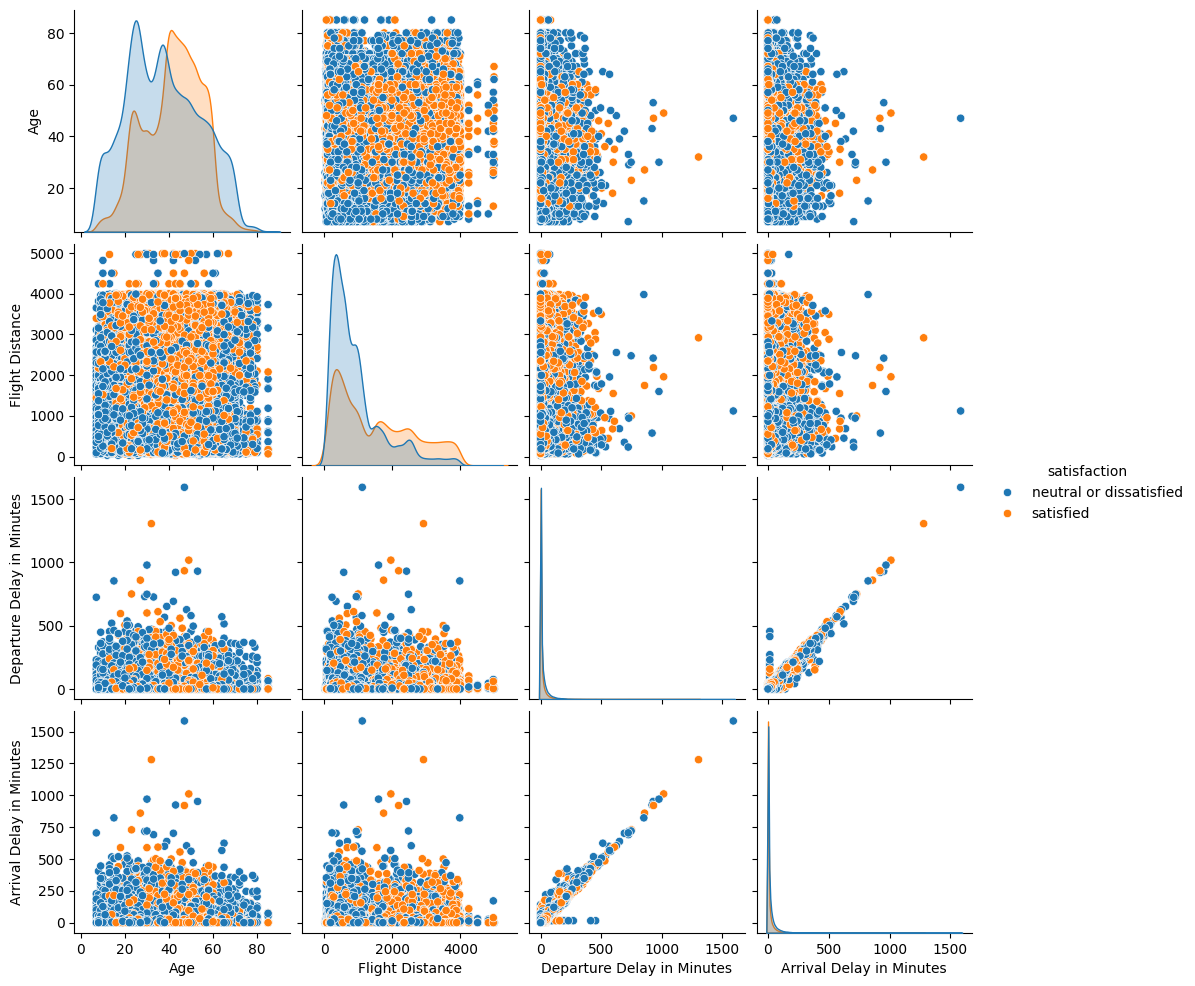

In [ ]:
plt.figure(figsize=(16, 12))
sns.pairplot(data, hue='satisfaction',vars=['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes'] )
plt.show()

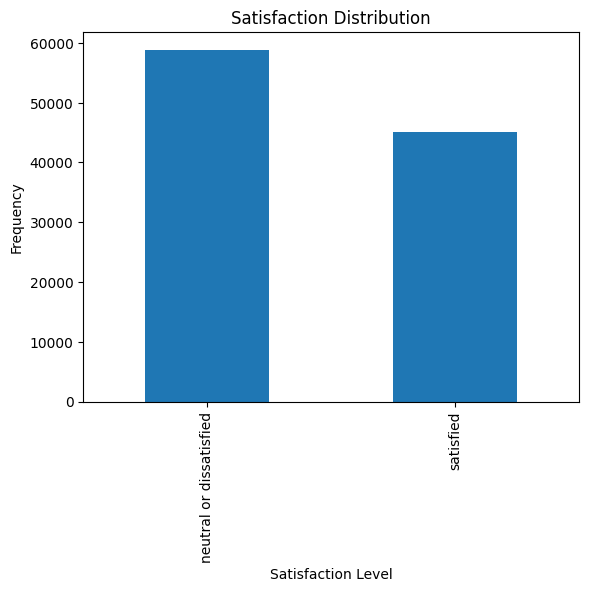

In [ ]:
data['satisfaction'].value_counts().plot(kind='bar')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#convert label to 0 and 1
data['satisfaction'] = data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

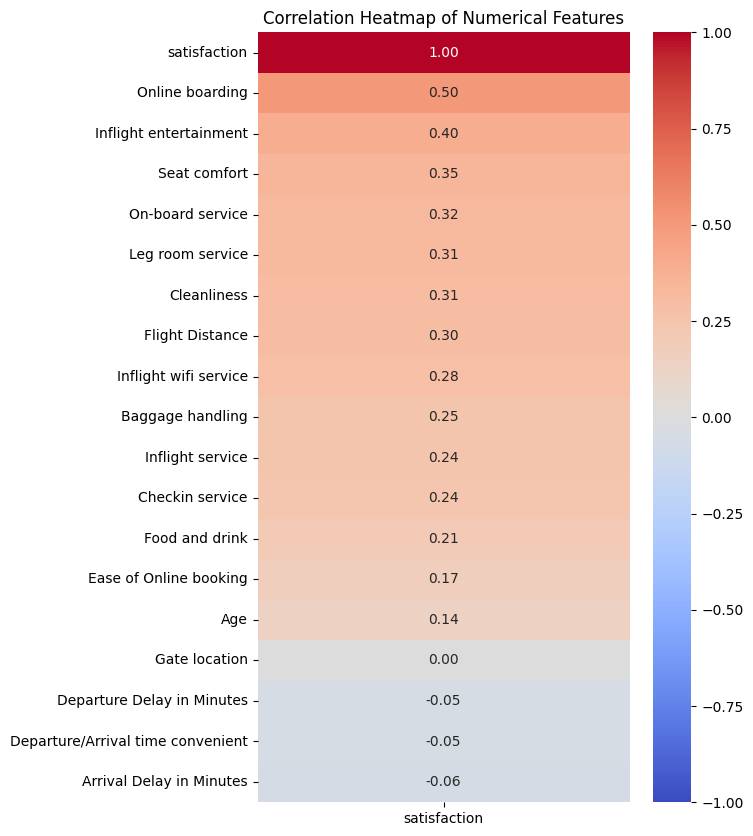

In [ ]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 10))

# Create the heatmap
corr_matrix = correlation_matrix[['satisfaction']].sort_values(by='satisfaction', ascending=False)

# Plot a smaller, clearer heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    fmt='.2f',  # Limit decimal places in annotations
    annot_kws={"size": 10}  # Adjust annotation font size
)

# Title and display the heatmap
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Define features and target variable
X = data.drop(columns=['satisfaction'])
y = data['satisfaction']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical features (replace with actual categorical column names)
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, average='weighted'),
        "recall": recall_score(y_true, y_pred, average='weighted'),
        "f1_score": f1_score(y_true, y_pred, average='weighted')
    }

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model


In [ ]:
def tune_catboost_cv(learning_rate, iterations, depth, X, y, cat_features, metric='f1'):
    # Initialize the CatBoost model
    model = CatBoostClassifier(
        learning_rate=learning_rate,
        iterations=iterations,
        depth=depth,
        verbose=0,  # Suppress logs
        random_state=42,
        cat_features=cat_features
    )
    # Define stratified k-fold cross-validation
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Choose the scoring metric
    if metric == 'accuracy':
        scoring = make_scorer(accuracy_score)
    elif metric == 'precision':
        scoring = make_scorer(precision_score, average='weighted')
    elif metric == 'recall':
        scoring = make_scorer(recall_score, average='weighted')
    elif metric == 'f1':
        scoring = make_scorer(f1_score, average='weighted')
    else:
        raise ValueError("Invalid metric. Choose from 'accuracy', 'precision', 'recall', or 'f1'.")
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring=scoring)
    # Report the mean and standard deviation of the scores
    print(f"Learning Rate: {learning_rate}, Iterations: {iterations}, Depth: {depth}")
    print(f"Mean {metric.capitalize()}: {np.mean(cv_scores):.4f}")
    return np.mean(cv_scores)

In [ ]:
results1 = []
#tuning with learning rate
results1.append(tune_catboost_cv(learning_rate=0.01, iterations=500, depth=4, X=X_train, y=y_train, metric='f1', cat_features=cat_features))
results1.append(tune_catboost_cv(learning_rate=0.03, iterations=500, depth=4, X=X_train, y=y_train, metric='f1', cat_features=cat_features))
results1.append(tune_catboost_cv(learning_rate=0.1, iterations=500, depth=4, X=X_train, y=y_train, metric='f1', cat_features=cat_features))

Learning Rate: 0.01, Iterations: 500, Depth: 4
Mean F1: 0.9424
Learning Rate: 0.03, Iterations: 500, Depth: 4
Mean F1: 0.9546
Learning Rate: 0.1, Iterations: 500, Depth: 4
Mean F1: 0.9614


In [ ]:
# Display the best result
print("Best F1-Score with learning rate:", max(results1))

Best F1-Score with learning rate: 0.9613964094147264


In [ ]:
#choosing the best learning rate , and tuning by iterations
results2 = []
results2.append(tune_catboost_cv(learning_rate=0.1, iterations=500, depth=4, X=X_train, y=y_train, metric='f1', cat_features=cat_features))
results2.append(tune_catboost_cv(learning_rate=0.1, iterations=1000, depth=4, X=X_train, y=y_train, metric='f1', cat_features=cat_features))
results2.append(tune_catboost_cv(learning_rate=0.1, iterations=2000, depth=4, X=X_train, y=y_train, metric='f1', cat_features=cat_features))

Learning Rate: 0.1, Iterations: 500, Depth: 4
Mean F1: 0.9614
Learning Rate: 0.1, Iterations: 1000, Depth: 4
Mean F1: 0.9625
Learning Rate: 0.1, Iterations: 2000, Depth: 4
Mean F1: 0.9624


In [ ]:
# Display the best result
print("Best F1-Score with iterations:", max(results2))
results2.index(max(results2))

Best F1-Score with iterations: 0.962471444128945


1

In [ ]:
#choosing the best learning rate and iterations , and tuning by iterations
results3 = []
results3.append(tune_catboost_cv(learning_rate=0.1, iterations=1000, depth=4, X=X_train, y=y_train, metric='f1', cat_features=cat_features))
results3.append(tune_catboost_cv(learning_rate=0.1, iterations=1000, depth=6, X=X_train, y=y_train, metric='f1', cat_features=cat_features))
results3.append(tune_catboost_cv(learning_rate=0.1, iterations=1000, depth=10, X=X_train, y=y_train, metric='f1', cat_features=cat_features))

Learning Rate: 0.1, Iterations: 1000, Depth: 4
Mean F1: 0.9625
Learning Rate: 0.1, Iterations: 1000, Depth: 6
Mean F1: 0.9636
Learning Rate: 0.1, Iterations: 1000, Depth: 10
Mean F1: 0.9626


In [ ]:
# Display the best result
print("Best F1-Score with depth:", max(results3))
results3.index(max(results3))

Best F1-Score with depth: 0.9636166209675343


1

Tuned Model

0:	learn: 0.5632331	total: 83.3ms	remaining: 1m 23s
1:	learn: 0.4375219	total: 150ms	remaining: 1m 14s
2:	learn: 0.3768402	total: 217ms	remaining: 1m 12s
3:	learn: 0.3213988	total: 285ms	remaining: 1m 10s
4:	learn: 0.2906703	total: 346ms	remaining: 1m 8s
5:	learn: 0.2696595	total: 411ms	remaining: 1m 8s
6:	learn: 0.2484637	total: 478ms	remaining: 1m 7s
7:	learn: 0.2327480	total: 549ms	remaining: 1m 8s
8:	learn: 0.2136545	total: 615ms	remaining: 1m 7s
9:	learn: 0.2014130	total: 681ms	remaining: 1m 7s
10:	learn: 0.1904055	total: 748ms	remaining: 1m 7s
11:	learn: 0.1839479	total: 824ms	remaining: 1m 7s
12:	learn: 0.1791827	total: 890ms	remaining: 1m 7s
13:	learn: 0.1732156	total: 948ms	remaining: 1m 6s
14:	learn: 0.1687077	total: 1.03s	remaining: 1m 7s
15:	learn: 0.1647032	total: 1.09s	remaining: 1m 7s
16:	learn: 0.1616645	total: 1.16s	remaining: 1m 6s
17:	learn: 0.1578497	total: 1.22s	remaining: 1m 6s
18:	learn: 0.1550122	total: 1.29s	remaining: 1m 6s
19:	learn: 0.1527154	total: 1.36s	re

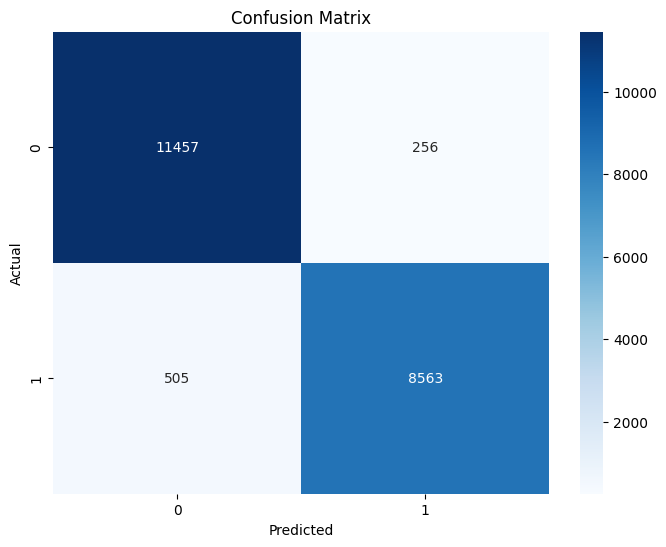

In [ ]:

cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
#Evaluate model with best Hyperprameters (all are the default except learning_rate)
best_tuned_model = CatBoostClassifier(learning_rate=0.1, iterations=1000,depth=6 ,cat_features=cat_features)
best_tuned_model.fit(X_train, y_train)

y_pred_train = best_tuned_model.predict(X_train)
y_pred_test = best_tuned_model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

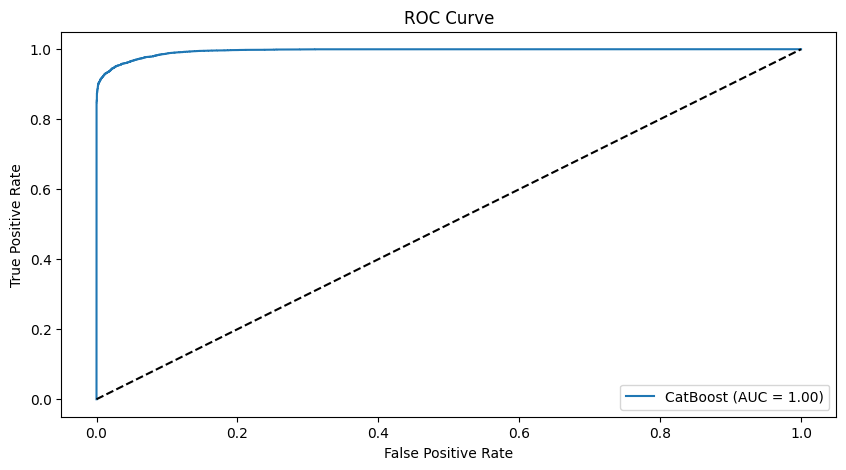

In [ ]:
y_prob = best_tuned_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='CatBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
cv_scores = cross_val_score(best_tuned_model, X, y, cv=stratified_kfold, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Streaming output truncated to the last 5000 lines.
2:	learn: 0.3780337	total: 352ms	remaining: 1m 56s
3:	learn: 0.3323600	total: 478ms	remaining: 1m 59s
4:	learn: 0.3032401	total: 627ms	remaining: 2m 4s
5:	learn: 0.2776690	total: 761ms	remaining: 2m 6s
6:	learn: 0.2511522	total: 889ms	remaining: 2m 6s
7:	learn: 0.2349402	total: 1.02s	remaining: 2m 6s
8:	learn: 0.2244941	total: 1.17s	remaining: 2m 8s
9:	learn: 0.2122569	total: 1.31s	remaining: 2m 9s
10:	learn: 0.2025415	total: 1.44s	remaining: 2m 9s
11:	learn: 0.1965913	total: 1.58s	remaining: 2m 10s
12:	learn: 0.1900972	total: 1.7s	remaining: 2m 9s
13:	learn: 0.1815234	total: 1.83s	remaining: 2m 9s
14:	learn: 0.1752402	total: 1.96s	remaining: 2m 8s
15:	learn: 0.1712544	total: 2.12s	remaining: 2m 10s
16:	learn: 0.1655504	total: 2.25s	remaining: 2m 10s
17:	learn: 0.1623810	total: 2.38s	remaining: 2m 9s
18:	learn: 0.1583023	total: 2.53s	remaining: 2m 10s
19:	learn: 0.1521010	total: 2.66s	remaining: 2m 10s
20:	learn: 0.1503713	total: 2.79s

Deafult Model

Training Accuracy: 0.97
Testing Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



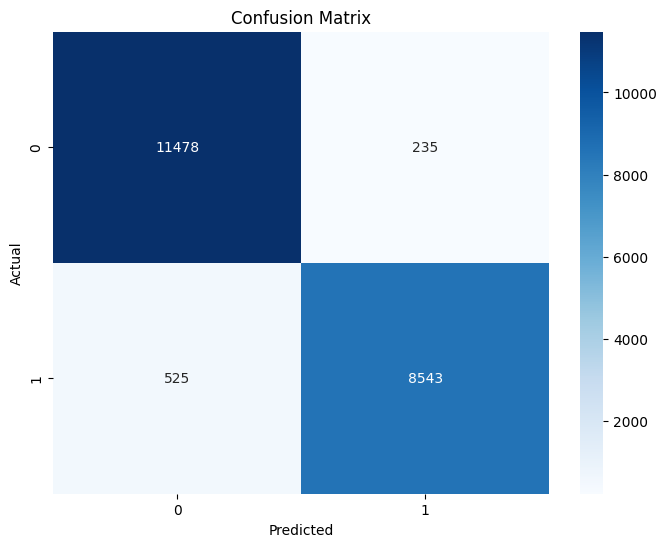

In [ ]:
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
model = CatBoostClassifier(verbose=0, cat_features=cat_features)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [101]:
# Perform cross-validation and calculate accuracy scores
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

# Print Cross-Validation Scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.9652086  0.96294692 0.96540109 0.96487176 0.96318576]
Mean CV Accuracy: 0.9643228255209617


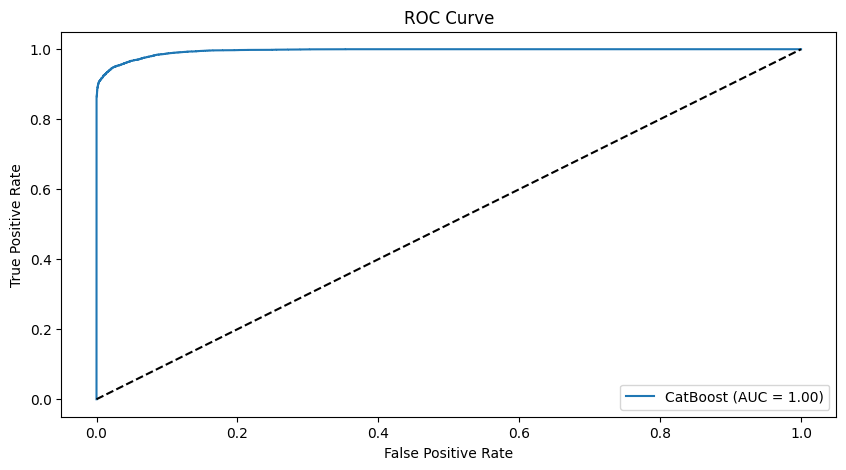

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='CatBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Feature Importance

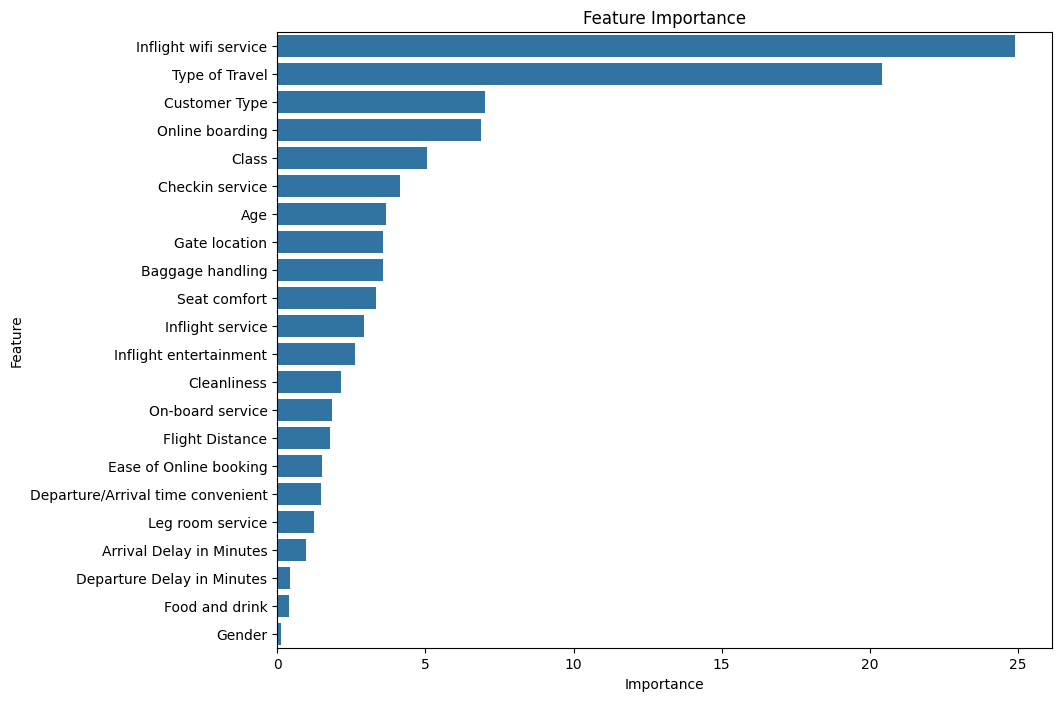

In [ ]:
#Based on Gain, SHAP, Frequency
# Get feature importance
feature_importances = model.get_feature_importance(prettified=True)

# Convert to a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    "Feature": feature_importances['Feature Id'],
    "Importance": feature_importances['Importances']
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importances_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


#Trying to remove the irrelevant features



In [ ]:
# List of features to drop
features_to_drop = ['Departure Delay in Minutes', 'Gender', 'Arrival Delay in Minutes',
                    'Ease of Online booking', 'Departure/Arrival time convenient']

# Drop features from training and testing datasets
X_train_filtered = X_train.drop(columns=features_to_drop)
X_test_filtered = X_test.drop(columns=features_to_drop)

In [99]:
cat_features = ['Customer Type', 'Type of Travel', 'Class']
model_filtered = CatBoostClassifier(verbose=0, cat_features=cat_features)
model_filtered.fit(X_train_filtered, y_train)
# Predict on the filtered test set
y_pred_filtered = model_filtered.predict(X_test_filtered)

# Initialize StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy scores
cv_scores = cross_val_score(model_filtered, X_train_filtered, y_train, cv=stratified_kfold, scoring='accuracy')

# Print Cross-Validation Scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.96330827 0.96258647 0.96415038 0.96438884 0.9637873 ]
Mean CV Accuracy: 0.9636442487354092


Training Accuracy (Filtered Model): 0.97
Testing Accuracy (Filtered Model): 0.96


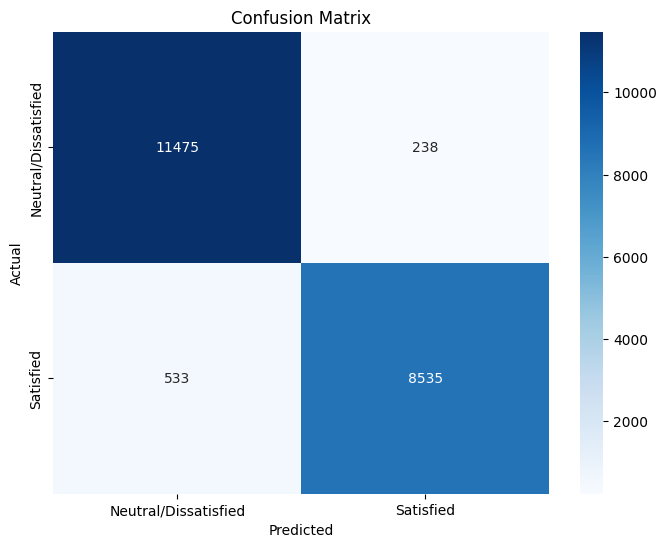

In [ ]:
# Calculate training accuracy for the filtered model
y_pred_train_filtered = model_filtered.predict(X_train_filtered)
train_accuracy_filtered = accuracy_score(y_train, y_pred_train_filtered)
print(f"Training Accuracy (Filtered Model): {train_accuracy_filtered:.2f}")

# Calculate testing accuracy for the filtered model
test_accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
print(f"Testing Accuracy (Filtered Model): {test_accuracy_filtered:.2f}")
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_filtered)
# Plot confusion matrix using seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


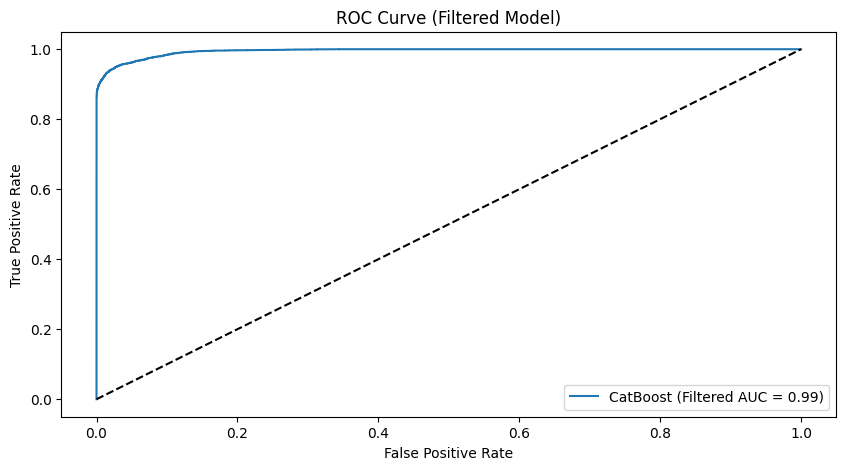

In [ ]:


# ROC Curve for the filtered model
# Get the predicted probabilities for the positive class
y_prob_filtered = model_filtered.predict_proba(X_test_filtered)[:, 1]  # Get probability for the positive class (satisfied)

# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_filtered, tpr_filtered, thresholds = roc_curve(y_test, y_prob_filtered)

# Compute AUC (Area Under the Curve)
roc_auc_filtered = auc(fpr_filtered, tpr_filtered)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr_filtered, tpr_filtered, label='CatBoost (Filtered AUC = {:.2f})'.format(roc_auc_filtered))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Filtered Model)')
plt.legend()
plt.show()

Bad Model

In [ ]:
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
bad_model = CatBoostClassifier(verbose=0, cat_features=cat_features,depth=1, iterations=5, learning_rate=0.9)
# Train the model on the entire training dataset
bad_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bad_model.predict(X_test)

Accuracy: 0.8853760646744623
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11713
           1       0.87      0.87      0.87      9068

    accuracy                           0.89     20781
   macro avg       0.88      0.88      0.88     20781
weighted avg       0.89      0.89      0.89     20781



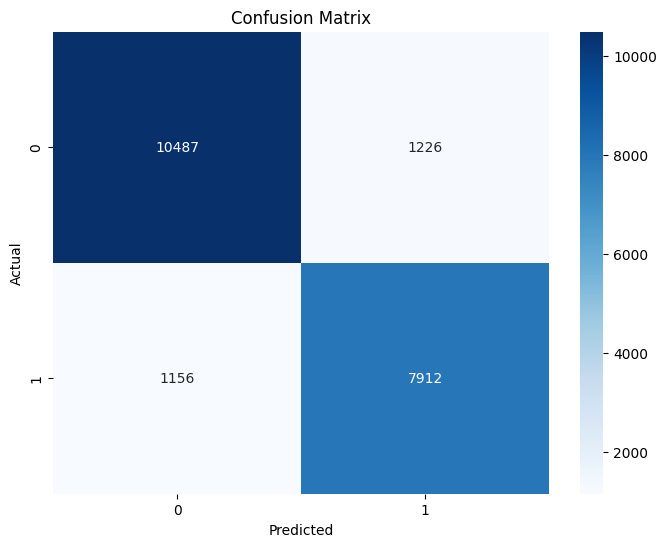

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

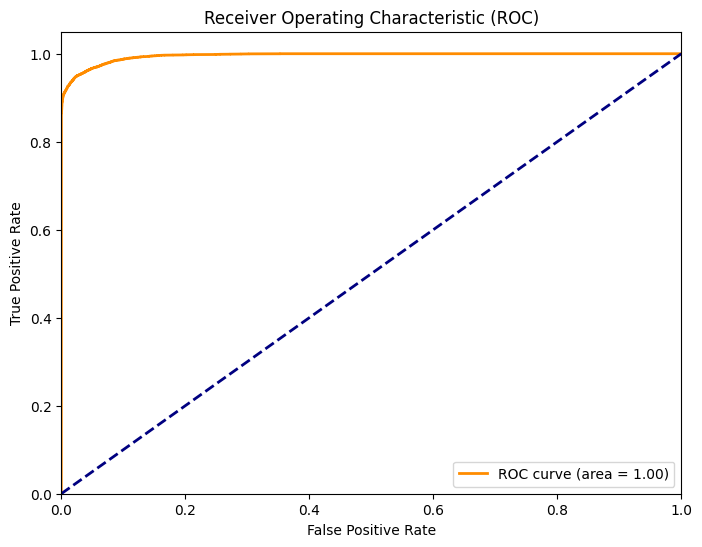

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Regulization


In [ ]:
def tune_catboost_cv_reg( l2_leaf_reg,X, y, cat_features, metric='f1'):
    # Initialize the CatBoost model
    model = CatBoostClassifier(
        verbose=0,  # Suppress logs
        l2_leaf_reg=l2_leaf_reg,
        cat_features=cat_features
    )

    # Define stratified k-fold cross-validation
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Choose the scoring metric
    if metric == 'accuracy':
        scoring = make_scorer(accuracy_score)
    elif metric == 'precision':
        scoring = make_scorer(precision_score, average='weighted')
    elif metric == 'recall':
        scoring = make_scorer(recall_score, average='weighted')
    elif metric == 'f1':
        scoring = make_scorer(f1_score, average='weighted')
    else:
        raise ValueError("Invalid metric. Choose from 'accuracy', 'precision', 'recall', or 'f1'.")

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring=scoring)

    # Report the mean and standard deviation of the scores
    print(f"L2_leaf_reg: {l2_leaf_reg} ")
    print(f"Mean {metric.capitalize()}: {np.mean(cv_scores):.4f}")
    return np.mean(cv_scores)

In [ ]:
results = []
#tuning with l2_leaf_reg
results.append(tune_catboost_cv_reg(l2_leaf_reg=1, X=X_train, y=y_train, metric='f1', cat_features=cat_features))
results.append(tune_catboost_cv_reg(l2_leaf_reg=5, X=X_train, y=y_train, metric='f1', cat_features=cat_features))
results.append(tune_catboost_cv_reg(l2_leaf_reg=10, X=X_train, y=y_train, metric='f1', cat_features=cat_features))

L2_leaf_reg: 1 
Mean F1: 0.9636
L2_leaf_reg: 5 
Mean F1: 0.9632
L2_leaf_reg: 10 
Mean F1: 0.9626


In [ ]:
# Display the best result
print("Best F1-Score with l2_leaf_reg:", max(results))

Best F1-Score with l2_leaf_reg: 0.9636403851298898


In [ ]:
reg_model1 = CatBoostClassifier(verbose=0,cat_features=cat_features,l2_leaf_reg=1)
reg_model1.fit(X_train, y_train)

Training Accuracy: 0.97
Testing Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



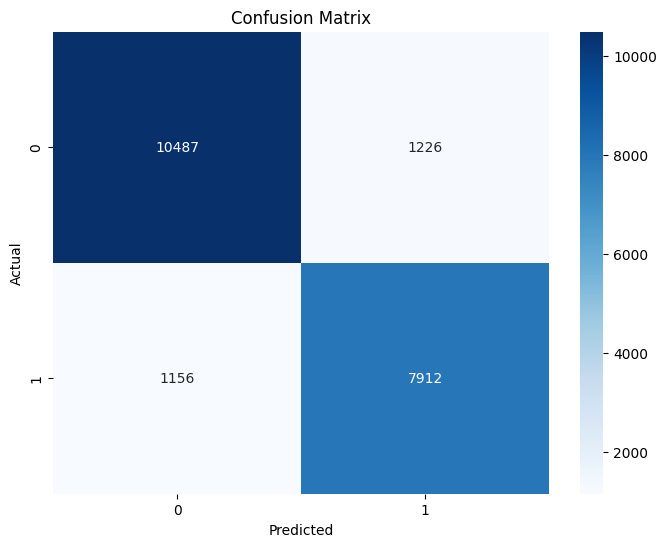

In [ ]:
y_pred_train = reg_model1.predict(X_train)
y_pred_test = reg_model1.predict(X_test)

train_accuracy1 = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy1 = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

conf_matrix1 = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

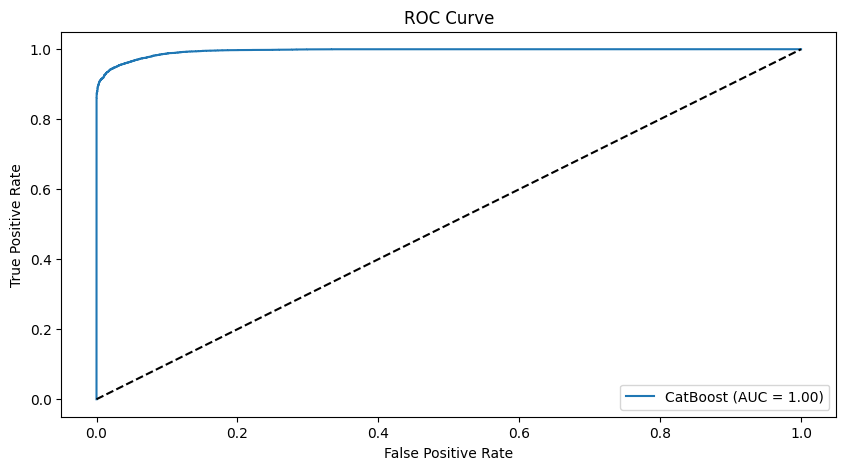

In [ ]:
y_prob1 = reg_model1.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='CatBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
cv_scores = cross_val_score(reg_model1, X, y, cv=stratified_kfold, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96487176 0.96212887 0.96506424 0.96419807 0.96323388]
Mean CV Accuracy: 0.9638993622431908


# Comparision

In [ ]:
data_dumm = pd.get_dummies(data, drop_first=True)

X1 = data_dumm.drop(columns=['satisfaction'])
y1 = data_dumm['satisfaction']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)


## CatBoost Classifier


In [ ]:
model_cb = CatBoostClassifier(verbose=0)
model_cb.fit(X_train1, y_train1)

Training Accuracy: 0.98
Testing Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



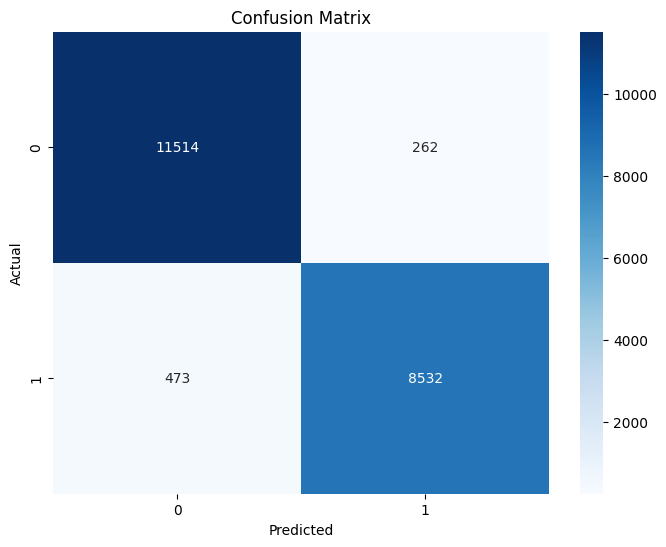

In [ ]:
y_pred_train1 = model_cb.predict(X_train1)
y_pred_test1 = model_cb.predict(X_test1)


train_accuracy = accuracy_score(y_train1, y_pred_train1)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test1, y_pred_test1)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test1, y_pred_test1))

conf_matrix = confusion_matrix(y_test1, y_pred_test1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

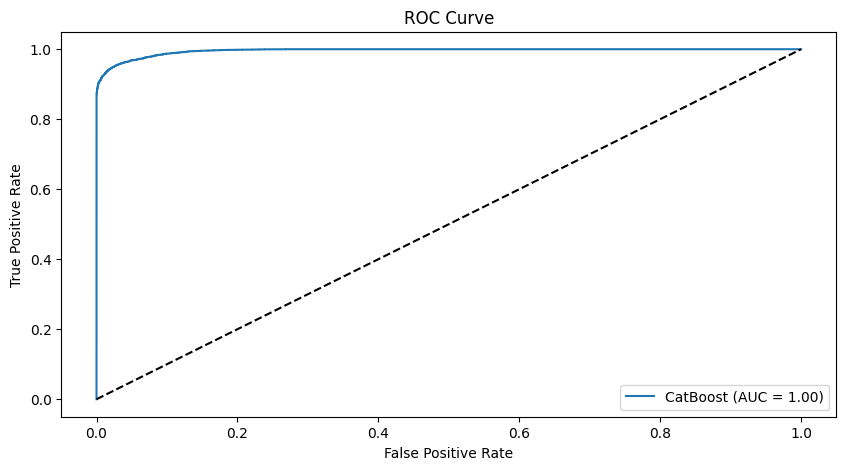

In [ ]:
y_prob1 = model_cb.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = roc_curve(y_test1, y_prob1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='CatBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

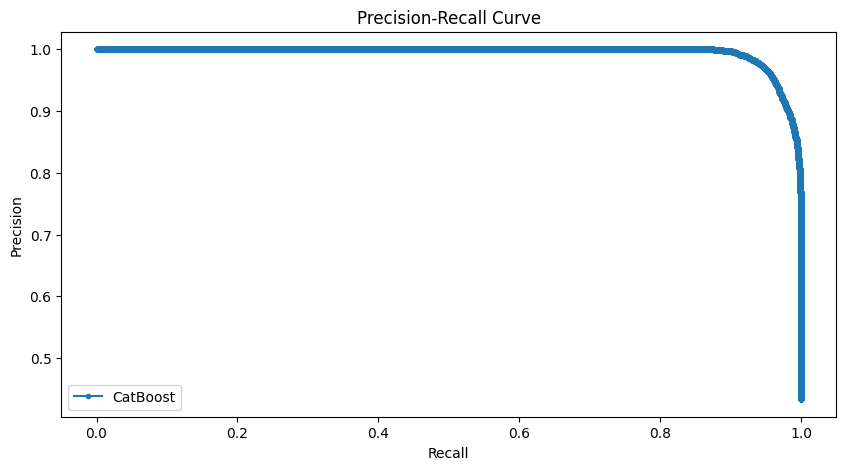

In [ ]:
precision, recall, _ = precision_recall_curve(y_test1, y_prob1)

plt.figure(figsize=(10, 5))
plt.plot(recall, precision, marker='.', label='CatBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
cv_scores = cross_val_score(model_cb, X1, y1, cv=stratified_kfold, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96362061 0.96227323 0.96453491 0.96501612 0.96366699]
Mean CV Accuracy: 0.963822373004066


## Random Forest Classifier

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



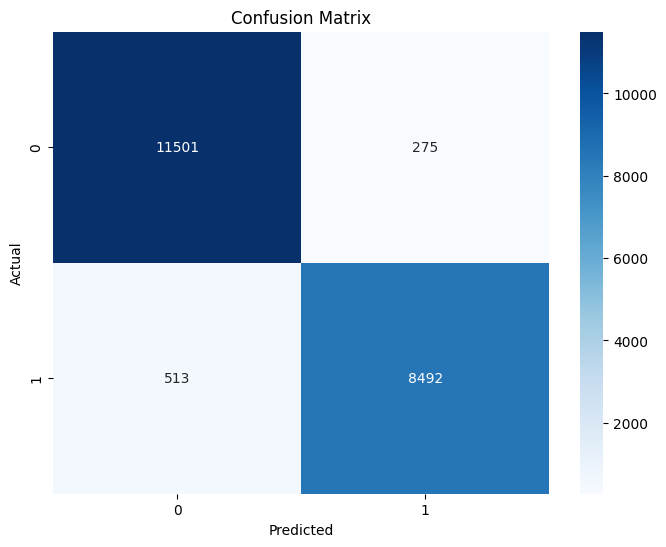

In [ ]:
y_pred_train1 = model_rf.predict(X_train1)
y_pred_test1 = model_rf.predict(X_test1)


train_accuracy = accuracy_score(y_train1, y_pred_train1)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test1, y_pred_test1)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test1, y_pred_test1))

conf_matrix = confusion_matrix(y_test1, y_pred_test1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



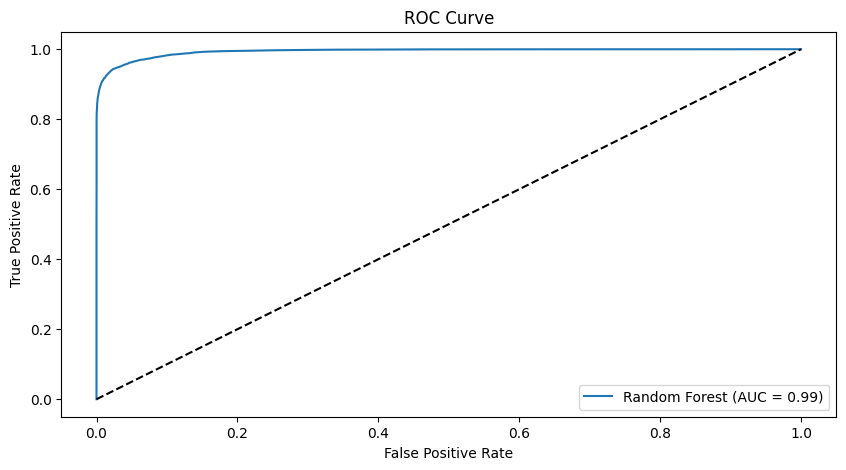

In [ ]:
y_prob1 = model_rf.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = roc_curve(y_test1, y_prob1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

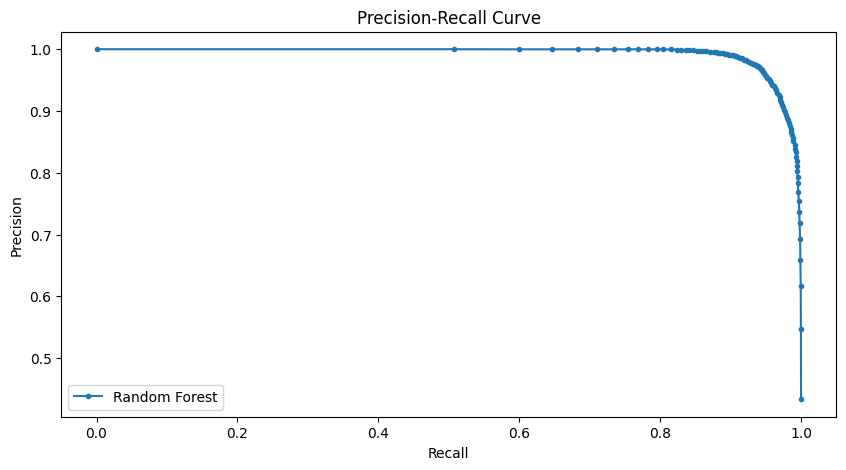

In [ ]:
precision, recall, _ = precision_recall_curve(y_test1, y_prob1)

plt.figure(figsize=(10, 5))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
cv_scores = cross_val_score(model_rf, X1, y1,  cv=stratified_kfold, scoring='accuracy')
mean_accuracy = cv_scores.mean()
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96217699 0.95977094 0.9628988  0.96015591 0.96005775]
Mean CV Accuracy: 0.9610120788965674


## Decision Tree Classifier


In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 0.94
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     11776
           1       0.93      0.94      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



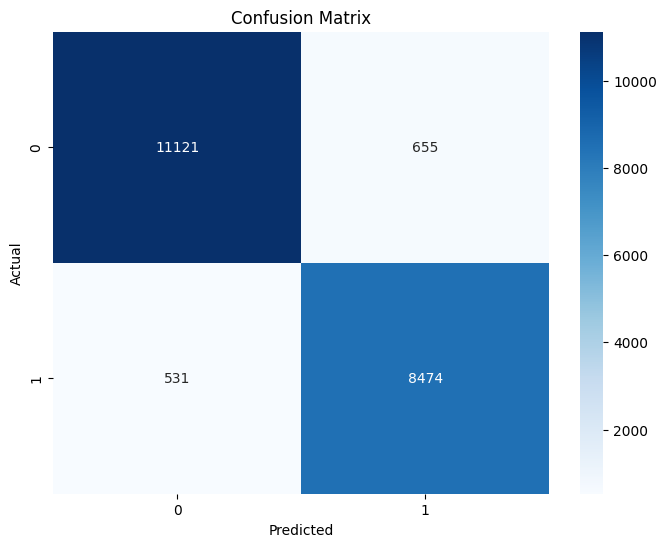

In [ ]:
y_pred_train1 = model_dt.predict(X_train1)
y_pred_test1 = model_dt.predict(X_test1)


train_accuracy = accuracy_score(y_train1, y_pred_train1)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test1, y_pred_test1)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test1, y_pred_test1))

conf_matrix = confusion_matrix(y_test1, y_pred_test1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


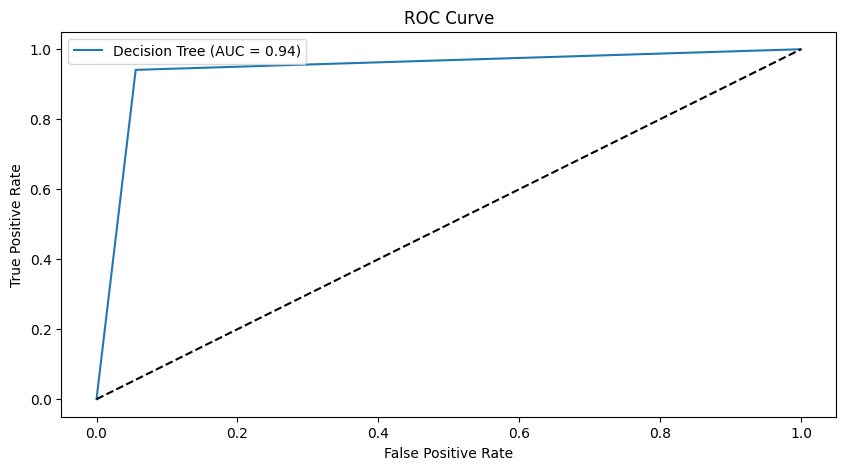

In [ ]:
y_prob1 = model_dt.predict_proba(X_test1)[:, 1]
fpr, tpr, _ = roc_curve(y_test1, y_prob1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

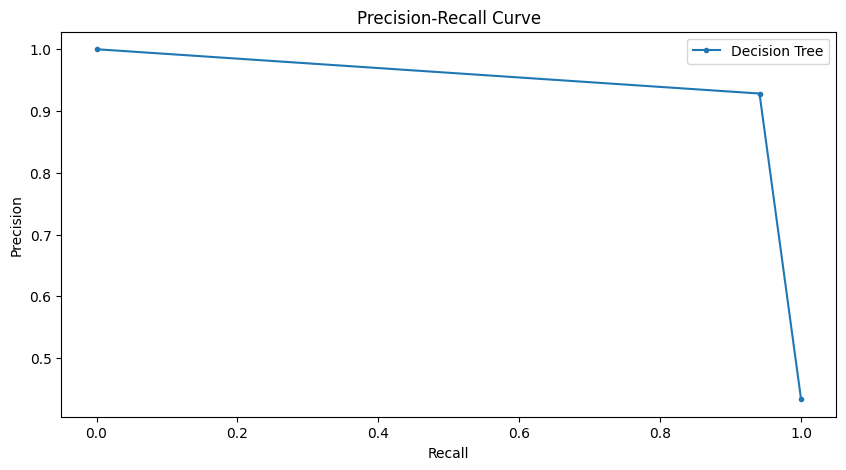

In [ ]:
precision, recall, _ = precision_recall_curve(y_test1, y_prob1)

plt.figure(figsize=(10, 5))
plt.plot(recall, precision, marker='.', label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
cv_scores = cross_val_score(model_dt, X1, y1, cv=stratified_kfold, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.94562341 0.94244743 0.94432414 0.94571965 0.94119346]
Mean CV Accuracy: 0.9438616158361508


# Without Irrelevant Features

In [ ]:
print(data_dumm.columns.tolist())

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction', 'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']


In [ ]:
# List of features to drop
features_to_drop = ['Departure Delay in Minutes','Gender_Male', 'Arrival Delay in Minutes',
                    'Ease of Online booking', 'Departure/Arrival time convenient']

# Drop features from training and testing datasets
X_train_filtered1 = X_train1.drop(columns=features_to_drop)
X_test_filtered1 = X_test1.drop(columns=features_to_drop)


## CatBoost Classifier

In [ ]:
model_cb_filtered1 = CatBoostClassifier(verbose=0)
model_cb_filtered1.fit(X_train_filtered1, y_train1)

Training Accuracy: 0.97
Testing Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



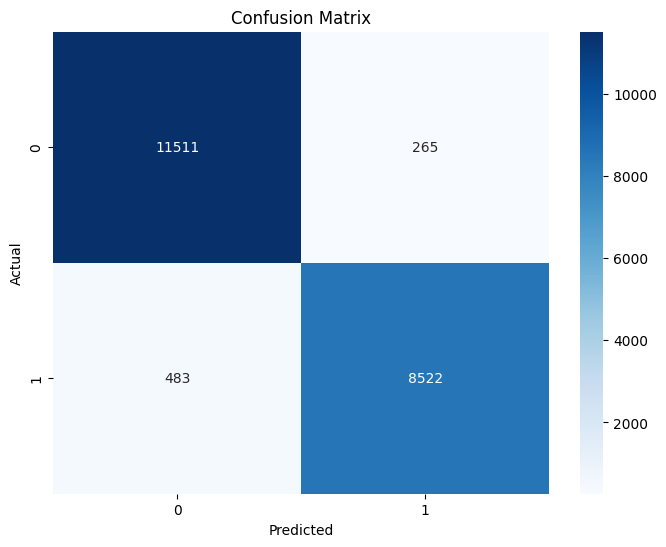

In [ ]:
y_pred_train_filtered1 = model_cb_filtered1.predict(X_train_filtered1)
y_pred_test_filtered1 = model_cb_filtered1.predict(X_test_filtered1)


train_accuracy = accuracy_score(y_train1, y_pred_train_filtered1)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test1, y_pred_test_filtered1)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test1, y_pred_test_filtered1))

conf_matrix = confusion_matrix(y_test1, y_pred_test_filtered1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
cv_scores = cross_val_score(model_cb_filtered1, X1, y1, cv=stratified_kfold, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96362061 0.96227323 0.96453491 0.96501612 0.96366699]
Mean CV Accuracy: 0.963822373004066


## Random Forest Classifier

In [ ]:
model_rf_filtered1 = RandomForestClassifier(random_state=42)
model_rf_filtered1.fit(X_train_filtered1, y_train1)

RandomForestClassifier(random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



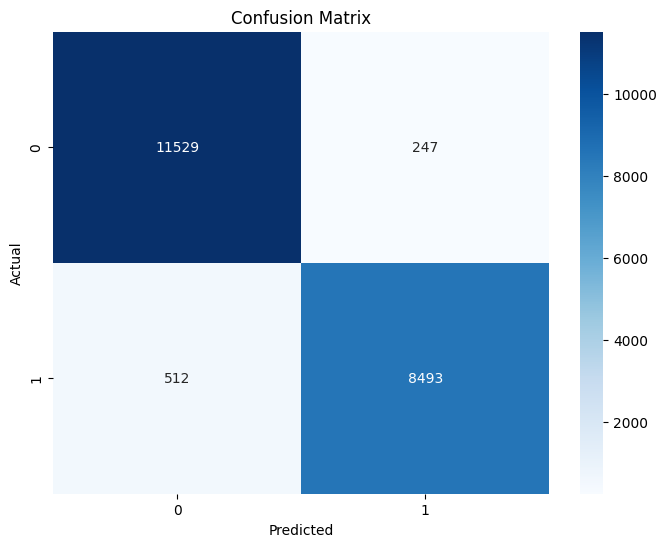

In [ ]:
y_pred_train_filtered1 = model_rf_filtered1.predict(X_train_filtered1)
y_pred_test_filtered1 = model_rf_filtered1.predict(X_test_filtered1)


train_accuracy = accuracy_score(y_train1, y_pred_train_filtered1)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test1, y_pred_test_filtered1)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test1, y_pred_test_filtered1))

conf_matrix = confusion_matrix(y_test1, y_pred_test_filtered1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
cv_scores = cross_val_score(model_rf_filtered1, X1, y1, cv=stratified_kfold, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.96217699 0.95977094 0.9628988  0.96015591 0.96005775]
Mean CV Accuracy: 0.9610120788965674


## Decision Tree Classifier

In [ ]:
model_dt_filtered1 = DecisionTreeClassifier(random_state=42)
model_dt_filtered1.fit(X_train_filtered1, y_train1)

DecisionTreeClassifier(random_state=42)

Training Accuracy: 1.00
Testing Accuracy: 0.95
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11776
           1       0.93      0.94      0.94      9005

    accuracy                           0.95     20781
   macro avg       0.94      0.95      0.94     20781
weighted avg       0.95      0.95      0.95     20781



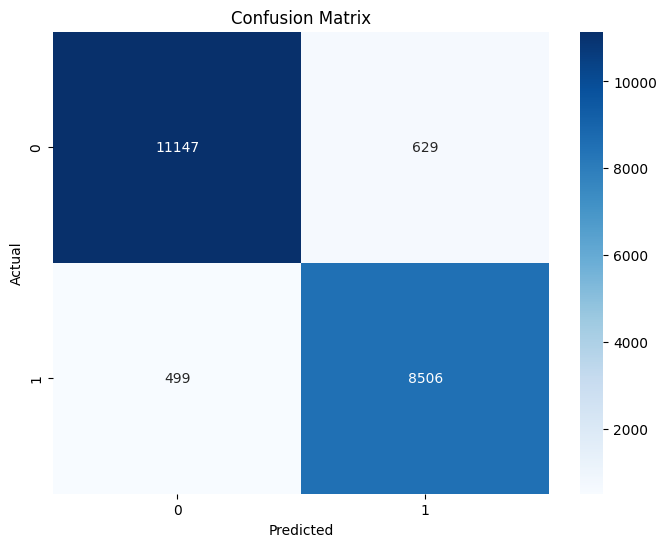

In [ ]:
y_pred_train_filtered1 = model_dt_filtered1.predict(X_train_filtered1)
y_pred_test_filtered1 = model_dt_filtered1.predict(X_test_filtered1)


train_accuracy = accuracy_score(y_train1, y_pred_train_filtered1)
print(f"Training Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test1, y_pred_test_filtered1)
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification report
print("Classification Report (Test):")
print(classification_report(y_test1, y_pred_test_filtered1))

conf_matrix = confusion_matrix(y_test1, y_pred_test_filtered1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
cv_scores = cross_val_score(model_dt_filtered1, X1, y1, cv=stratified_kfold, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.94562341 0.94244743 0.94432414 0.94571965 0.94119346]
Mean CV Accuracy: 0.9438616158361508
